In [1]:
import sys, os
sys.path.append(os.path.join(os.path.dirname(os.path.realpath('__file__')), '..'))
from openparticle import *
import numpy as np
import cirq
from src.lobe.system import System
from src.lobe.lobe_circuit import lobe_circuit
from src.lobe.block_encoding import add_lobe_oracle
from cirq.contrib.svg import SVGCircuit
from src.lobe.usp import add_naive_usp
from src.lobe.rescale import rescale_terms, get_numbers_of_bosonic_operators_in_terms
from src.lobe._utils import get_basis_of_full_system
import matplotlib.pyplot as plt

/Users/carterm.gustin/anaconda3/envs/phd/lib/python3.9/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


\begin{equation}
H = \sum_n^{\Lambda_{f}} b_n^\dagger b_n + \sum_n^{\Lambda_{af}} d_n^\dagger d_n + \sum_n^{\Lambda_{b}} a_n^\dagger a_n + \sum_{i,j,k,l}^{\Lambda_b} a_i^\dagger a_j^\dagger a_k a_l + \sum_{i,j,k}^{\Lambda_f, \Lambda_{af}, \Lambda_b} \left(b_i^\dagger d_j^\dagger a_k + b_i d_j a_k^\dagger \right)
\end{equation}

In [57]:
Lambda_f = Lambda_af = 2
Lambda_b = 2
max_occ = 3

In [58]:
Hfree = (
    ParticleOperator('b0^ b0')
    + ParticleOperator('b1^ b1')
    + ParticleOperator('d0^ d0')
    + ParticleOperator('d1^ d1')
    + ParticleOperator('a0^ a0')
    + ParticleOperator('a1^ a1')
)


In [59]:
H_four_pt_gluon = ParticleOperator({})

for i in range(Lambda_b):
    for j in range(Lambda_b):
        for k in range(Lambda_b):
            for l in range(Lambda_b):
                four_pt_str = 'a' + str(i) + '^ ' + 'a' + str(j) + '^ ' + 'a' + str(k) + ' a' + str(l)
                H_four_pt_gluon += ParticleOperator(four_pt_str)

In [60]:
H_pair_production = ParticleOperator({})
H_pair_annihilation = ParticleOperator({})

for i in range(Lambda_f ):
    for j in range(Lambda_af ):
        for k in range(Lambda_b ):
            production_str = 'b' + str(i) + "^ " + 'd' + str(j) + "^ " + 'a' + str(k)
            annihilation_str = 'b' + str(i) + ' d' + str(j) + ' a' + str(k) + "^"
            H_pair_production += ParticleOperator(production_str)
            H_pair_annihilation += ParticleOperator(annihilation_str)

In [61]:
hamiltonian = Hfree + H_pair_annihilation + H_pair_production #+ H_four_pt_gluon

In [62]:
hamiltonian.display()

<IPython.core.display.Latex object>

In [76]:
len(hamiltonian)

22

In [63]:
basis = get_fock_basis(hamiltonian, max_occ)

In [64]:
ham_matrix = generate_matrix(hamiltonian, basis)

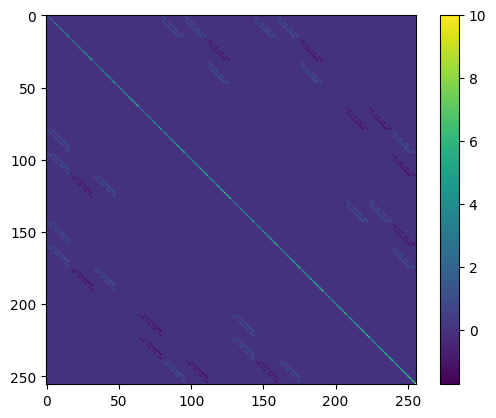

In [67]:
plt.imshow(ham_matrix)
plt.colorbar()

In [74]:
circuit, unitary, matrix = lobe_circuit(hamiltonian, max_occ, return_unitary=False)

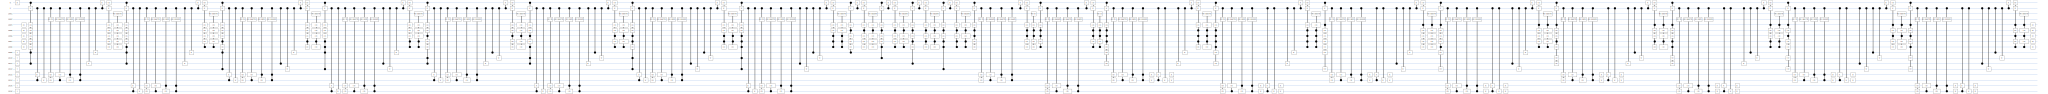

In [75]:
SVGCircuit(circuit)